# Walmart Sales forecasting

In [1]:
# https://www.kaggle.com/yehyachali/of-walmart-sales-forecasting/notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
pd.set_option('display.max_rows', 50)

In [4]:
df_store = pd.read_csv('stores.csv')
df_feature = pd.read_csv('features.csv', parse_dates=[1])
df_train = pd.read_csv('train.csv', parse_dates=[2])
df_test = pd.read_csv('test.csv', parse_dates=[2])

In [5]:
df_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [6]:
df_feature.shape

(8190, 12)

In [7]:
df_train.shape

(421570, 5)

In [8]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [9]:
df_store.groupby('Type').agg({'Size': ['min', 'max', 'mean'], 'Store': 'count'})

Size                        Store
        min     max           mean count
Type                                    
A     39690  219622  177247.727273    22
B     34875  140167  101190.705882    17
C     39690   42988   40541.666667     6

(30000.0, 220000.0)

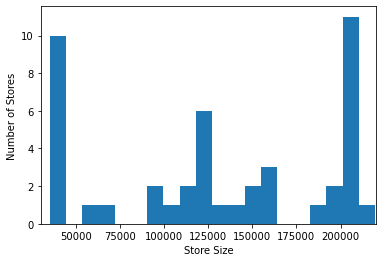

In [10]:
plt.hist(df_store['Size'], bins=20)
plt.xlabel('Store Size')
plt.ylabel('Number of Stores')
plt.xlim([30000,220000])

In [11]:
df_feature.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [12]:
df_feature.describe().transpose()

count         mean           std       min          25%  \
Store         8190.0    23.000000     12.987966     1.000    12.000000   
Temperature   8190.0    59.356198     18.678607    -7.290    45.902500   
Fuel_Price    8190.0     3.405992      0.431337     2.472     3.041000   
MarkDown1     4032.0  7032.371786   9262.747448 -2781.450  1577.532500   
MarkDown2     2921.0  3384.176594   8793.583016  -265.760    68.880000   
MarkDown3     3613.0  1760.100180  11276.462208  -179.260     6.600000   
MarkDown4     3464.0  3292.935886   6792.329861     0.220   304.687500   
MarkDown5     4050.0  4132.216422  13086.690278  -185.170  1440.827500   
CPI           7605.0   172.460809     39.738346   126.064   132.364839   
Unemployment  7605.0     7.826821      1.877259     3.684     6.634000   

                      50%          75%            max  
Store           23.000000    34.000000      45.000000  
Temperature     60.710000    73.880000     101.950000  
Fuel_Price       3.513000     3.743000       4.468000  
MarkDown1     4743.580000  8923.310000  103184.980000  
MarkDown2      364.570000  2153.350000  104519.540000  
MarkDown3       36.260000   163.150000  149483.310000  
MarkDown4     1176.425000  3310.007500   67474.850000  
MarkDown5     2727.135000  4832.555000  771448.100000  
CPI            182.764003   213.932412     228.976456  
Unemployment     7.806000     8.567000      14.313000

In [13]:
# Percentage of missing Values
df_feature.isna().sum()/len(df_feature)*100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

In [14]:
# MarkDown1~MarkDown5 miss too mach values, drop those columns
df_feature.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace=True)

In [15]:
df_feature.groupby('Date').agg(['mean', 'min', 'max'])[['CPI','Unemployment']]

CPI                         Unemployment               
                  mean         min         max         mean    min     max
Date                                                                      
2010-02-05  167.730885  126.442065  214.655459     8.619311  5.892  13.975
2010-02-12  167.825608  126.496258  214.805653     8.619311  5.892  13.975
2010-02-19  167.871686  126.526286  214.850618     8.619311  5.892  13.975
2010-02-26  167.909657  126.552286  214.878045     8.619311  5.892  13.975
2010-03-05  167.947628  126.578286  214.905472     8.619311  5.892  13.975
...                ...         ...         ...          ...    ...     ...
2013-06-28         NaN         NaN         NaN          NaN    NaN     NaN
2013-07-05         NaN         NaN         NaN          NaN    NaN     NaN
2013-07-12         NaN         NaN         NaN          NaN    NaN     NaN
2013-07-19         NaN         NaN         NaN          NaN    NaN     NaN
2013-07-26         NaN         NaN         NaN          NaN    NaN     NaN

[182 rows x 6 columns]

In [16]:
pd.set_option('display.max_rows', None)
df_feature[df_feature['CPI'].isnull()]

Store       Date  Temperature  Fuel_Price  CPI  Unemployment  IsHoliday
169       1 2013-05-03        66.66       3.386  NaN           NaN      False
170       1 2013-05-10        63.90       3.392  NaN           NaN      False
171       1 2013-05-17        69.53       3.454  NaN           NaN      False
172       1 2013-05-24        77.19       3.494  NaN           NaN      False
173       1 2013-05-31        78.02       3.466  NaN           NaN      False
174       1 2013-06-07        76.44       3.439  NaN           NaN      False
175       1 2013-06-14        79.86       3.431  NaN           NaN      False
176       1 2013-06-21        81.35       3.479  NaN           NaN      False
177       1 2013-06-28        83.94       3.495  NaN           NaN      False
178       1 2013-07-05        79.85       3.422  NaN           NaN      False
179       1 2013-07-12        83.12       3.400  NaN           NaN      False
180       1 2013-07-19        79.26       3.556  NaN           NaN      False
181       1 2013-07-26        81.54       3.620  NaN           NaN      False
351       2 2013-05-03        65.26       3.386  NaN           NaN      False
352       2 2013-05-10        63.51       3.392  NaN           NaN      False
353       2 2013-05-17        70.55       3.454  NaN           NaN      False
354       2 2013-05-24        76.83       3.494  NaN           NaN      False
355       2 2013-05-31        78.05       3.466  NaN           NaN      False
356       2 2013-06-07        76.20       3.439  NaN           NaN      False
357       2 2013-06-14        80.91       3.431  NaN           NaN      False
358       2 2013-06-21        81.11       3.479  NaN           NaN      False
359       2 2013-06-28        85.37       3.495  NaN           NaN      False
360       2 2013-07-05        79.48       3.422  NaN           NaN      False
361       2 2013-07-12        85.41       3.400  NaN           NaN      False
362       2 2013-07-19        79.16       3.556  NaN           NaN      False
363       2 2013-07-26        83.17       3.620  NaN           NaN      False
533       3 2013-05-03        69.73       3.386  NaN           NaN      False
534       3 2013-05-10        68.93       3.392  NaN           NaN      False
535       3 2013-05-17        75.33       3.454  NaN           NaN      False
536       3 2013-05-24        81.27       3.494  NaN           NaN      False
537       3 2013-05-31        78.99       3.466  NaN           NaN      False
538       3 2013-06-07        80.11       3.439  NaN           NaN      False
539       3 2013-06-14        78.61       3.431  NaN           NaN      False
540       3 2013-06-21        82.81       3.479  NaN           NaN      False
541       3 2013-06-28        85.14       3.495  NaN           NaN      False
542       3 2013-07-05        81.59       3.422  NaN           NaN      False
543       3 2013-07-12        84.86       3.400  NaN           NaN      False
544       3 2013-07-19        81.11       3.556  NaN           NaN      False
545       3 2013-07-26        85.53       3.620  NaN           NaN      False
715       4 2013-05-03        64.18       3.369  NaN           NaN      False
716       4 2013-05-10        64.01       3.371  NaN           NaN      False
717       4 2013-05-17        70.50       3.437  NaN           NaN      False
718       4 2013-05-24        76.73       3.462  NaN           NaN      False
719       4 2013-05-31        79.17       3.438  NaN           NaN      False
720       4 2013-06-07        78.11       3.413  NaN           NaN      False
721       4 2013-06-14        79.24       3.415  NaN           NaN      False
722       4 2013-06-21        79.10       3.453  NaN           NaN      False
723       4 2013-06-28        86.29       3.452  NaN           NaN      False
724       4 2013-07-05        76.96       3.385  NaN           NaN      False
725       4 2013-07-12        82.30       3.368  NaN           NaN      False
726       4 2013-07-19      

In [17]:
# fill na value (CPI and Unemployment columns)
df_feature['CPI'].ffill(inplace=True)
df_feature['Unemployment'].ffill(inplace=True) 

In [18]:
df_feature_1 = df_feature[df_feature['Store'] == 1]
df_feature_1

Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0        1 2010-02-05        42.31       2.572  211.096358         8.106   
1        1 2010-02-12        38.51       2.548  211.242170         8.106   
2        1 2010-02-19        39.93       2.514  211.289143         8.106   
3        1 2010-02-26        46.63       2.561  211.319643         8.106   
4        1 2010-03-05        46.50       2.625  211.350143         8.106   
5        1 2010-03-12        57.79       2.667  211.380643         8.106   
6        1 2010-03-19        54.58       2.720  211.215635         8.106   
7        1 2010-03-26        51.45       2.732  211.018042         8.106   
8        1 2010-04-02        62.27       2.719  210.820450         7.808   
9        1 2010-04-09        65.86       2.770  210.622857         7.808   
10       1 2010-04-16        66.32       2.808  210.488700         7.808   
11       1 2010-04-23        64.84       2.795  210.439123         7.808   
12       1 2010-04-30        67.41       2.780  210.389546         7.808   
13       1 2010-05-07        72.55       2.835  210.339968         7.808   
14       1 2010-05-14        74.78       2.854  210.337426         7.808   
15       1 2010-05-21        76.44       2.826  210.617093         7.808   
16       1 2010-05-28        80.44       2.759  210.896761         7.808   
17       1 2010-06-04        80.69       2.705  211.176428         7.808   
18       1 2010-06-11        80.43       2.668  211.456095         7.808   
19       1 2010-06-18        84.11       2.637  211.453772         7.808   
20       1 2010-06-25        84.34       2.653  211.338653         7.808   
21       1 2010-07-02        80.91       2.669  211.223533         7.787   
22       1 2010-07-09        80.48       2.642  211.108414         7.787   
23       1 2010-07-16        83.15       2.623  211.100385         7.787   
24       1 2010-07-23        83.36       2.608  211.235144         7.787   
25       1 2010-07-30        81.84       2.640  211.369903         7.787   
26       1 2010-08-06        87.16       2.627  211.504662         7.787   
27       1 2010-08-13        87.00       2.692  211.639421         7.787   
28       1 2010-08-20        86.65       2.664  211.603363         7.787   
29       1 2010-08-27        85.22       2.619  211.567306         7.787   
30       1 2010-09-03        81.21       2.577  211.531248         7.787   
31       1 2010-09-10        78.69       2.565  211.495190         7.787   
32       1 2010-09-17        82.11       2.582  211.522460         7.787   
33       1 2010-09-24        80.94       2.624  211.597225         7.787   
34       1 2010-10-01        71.89       2.603  211.671989         7.838   
35       1 2010-10-08        63.93       2.633  211.746754         7.838   
36       1 2010-10-15        67.18       2.720  211.813744         7.838   
37       1 2010-10-22        69.86       2.725  211.861294         7.838   
38       1 2010-10-29        69.64       2.716  211.908844         7.838   
39       1 2010-11-05        58.74       2.689  211.956394         7.838   
40       1 2010-11-12        59.61       2.728  212.003944         7.838   
41       1 2010-11-19        51.41       2.771  211.889674         7.838   
42       1 2010-11-26        64.52       2.735  211.748433         7.838   
43       1 2010-12-03        49.27       2.708  211.607193         7.838   
44       1 2010-12-10        46.33       2.843  211.465953         7.838   
45       1 2010-12-17        49.84       2.869  211.405312         7.838   
46       1 2010-12-24        52.33       2.886  211.405122         7.838   
47       1 2010-12-31        48.43       2.943  211.404932         7.838   
48       1 2011-01-07        48.27       2.976  211.404742         7.742   
49       1 2011-01-14        35.40       2.983  211.457411         7.742   
50       1 2011-01-21        44.04       3.016  211.827234         7.742   
51       1 2011-01-28        43.83       3.010  212.1

Text(0, 0.5, 'Temperature')

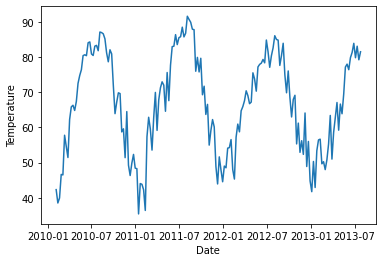

In [19]:
df_feature_1 = df_feature[df_feature['Store'] == 1]
plt.plot(df_feature_1['Date'], df_feature_1['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')

Text(0, 0.5, 'Fuel_Price')

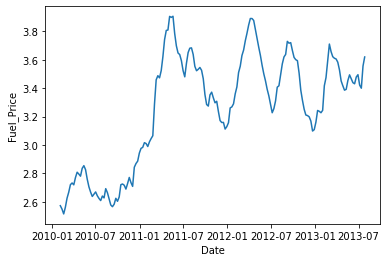

In [20]:
plt.plot(df_feature_1['Date'], df_feature_1['Fuel_Price'])
plt.xlabel('Date')
plt.ylabel('Fuel_Price')

Text(0, 0.5, 'CPI')

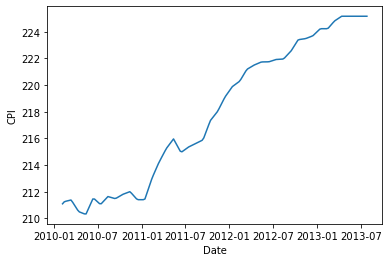

In [21]:
df_feature_1 = df_feature[df_feature['Store'] == 1]
plt.plot(df_feature_1['Date'], df_feature_1['CPI'])
plt.xlabel('Date')
plt.ylabel('CPI')
#plt.ylim([200, 230])

Text(0, 0.5, 'Unemployment')

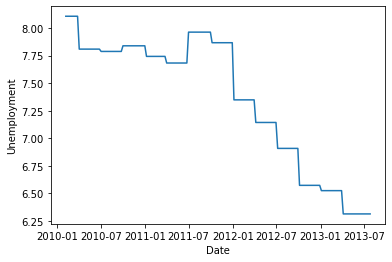

In [22]:
plt.plot(df_feature_1['Date'], df_feature_1['Unemployment'])
plt.xlabel('Date')
plt.ylabel('Unemployment')

<AxesSubplot:>

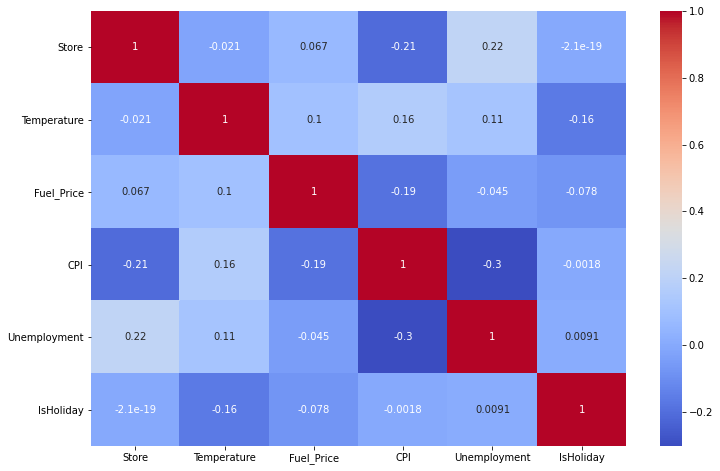

In [23]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_feature.corr(), annot= True, cmap= 'coolwarm')

In [24]:
df_feature_train = df_feature[df_feature['Date'].between('2010-02-05', '2012-10-26')]
df_feature_test = df_feature[df_feature['Date'].between('2012-11-02', '2013-07-26')]

In [25]:
df_train_group = df_train.groupby(['Store', 'Date']).mean()[['Weekly_Sales', 'IsHoliday']]
df_test_group = df_test.groupby(['Store', 'Date']).mean()[['IsHoliday']]

In [26]:
df_train_group.reset_index(inplace=True)

(0.0, 200000.0)

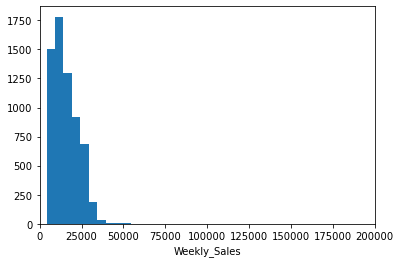

In [27]:
plt.hist(df_train_group['Weekly_Sales'])
plt.xlabel('Weekly_Sales')
#plt.ylabel('Number of Stores')
plt.xlim([0, 200000])

In [28]:
df_feature_train.head()

Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  
0      False  
1       True  
2      False  
3      False  
4      False

In [168]:
train = df_train_group.merge(df_feature_train, on=['Store', 'Date'])
test = df_test_group.merge(df_feature_test, on=['Store', 'Date'])

In [169]:
train.head()

Store       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1 2010-02-05  22516.313699        False        42.31       2.572   
1      1 2010-02-12  22804.964444         True        38.51       2.548   
2      1 2010-02-19  22081.755753        False        39.93       2.514   
3      1 2010-02-26  19579.549861        False        46.63       2.561   
4      1 2010-03-05  21298.721644        False        46.50       2.625   

          CPI  Unemployment  IsHoliday_y  
0  211.096358         8.106        False  
1  211.242170         8.106         True  
2  211.289143         8.106        False  
3  211.319643         8.106        False  
4  211.350143         8.106        False

In [170]:
# 將45家店的資料合併取平均，維度為日期
df = train.groupby('Date').mean().drop('Store', axis=1).reset_index()
df.head()

Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price         CPI  \
0 2010-02-05  16209.922128        False    34.037333    2.717844  167.730885   
1 2010-02-12  15794.946081         True    34.151333    2.694022  167.825608   
2 2010-02-19  15645.953012        False    37.719778    2.672067  167.871686   
3 2010-02-26  14397.682819        False    39.243556    2.683933  167.909657   
4 2010-03-05  15376.871198        False    42.917333    2.731200  167.947628   

   Unemployment  IsHoliday_y  
0      8.619311        False  
1      8.619311         True  
2      8.619311        False  
3      8.619311        False  
4      8.619311        False

## Model: Linear Regression

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Weekly_Sales', 'Date'], axis=1),
   df[['Weekly_Sales']],
   test_size=0.20,
   random_state=111,
   shuffle=True);

In [173]:
X_train.shape

(114, 6)

In [174]:
X_test.shape

(29, 6)

In [175]:
reg = LinearRegression().fit(X_train, y_train)

In [176]:
# Return the coefficient of determination of the prediction.
reg.score(X_train, y_train)

0.09567735378042008

In [177]:
reg.coef_

array([[  514.9278855 ,   -12.8653024 , -1372.86452317,   714.55330717,
         3646.55765857,   514.9278855 ]])

In [178]:
reg.intercept_

array([-130926.39015313])